# Assignment 0: Single-qubit states, the Q Sphere and some simple Quantum Circuits

In this lab, you will learn how to write `Qiskit` code and investigate manipulating single-qubit states, learn about the Q Sphere visualization tool from qiskit and get a very general introduction to the Quantum Circuit Model. These notes are not primary materials for this course and are intended to be used as supplementary materials in addition to the book - *Quantum Computation and Quantum Information* - and Dr. Farias' lectures.

The purpose of this assignment is to review some base materials learned in the QIC class and see how those concepts are implemented computationally using qiskit and also to get some hands on experience using qiskit.

**Before You Start:**


If you have not used Jupyter notebooks before, take a look at the following video to quickly get started.
- https://www.youtube.com/watch?v=jZ952vChhuI

Remember, to run a cell in Jupyter notebooks, you press `Shift` + `Return/Enter` on your keyboard.

### Installing necessary packages

Before we begin, you will need to install some prerequisites into your environment. Run the cell below to complete these installations. At the end, the cell outputs will be cleared.

In [3]:
#!pip install -U -r requirements.txt

!python -m pip install --user -r requirements.txt

from IPython.display import clear_output

clear_output()


# Single-qubit states

From chapter 1 of *Quantum Computation and Quantum Information*, we learned that single qubit states can be written down generally as 

$$\sqrt{1-p}\vert0\rangle + e^{i\phi}\sqrt{p}\vert1\rangle$$

Here, $p$ is the probability that a measurement of the state in the computational basis $\{\vert0\rangle, \vert1\rangle\}$ will have the outcome $1$, and $\phi$ is the phase between the two computational basis states. 

Single-qubit gates can then be used to manipulate this quantum state by changing either $p$, $\phi$, or both.

Let's begin by creating a single-qubit quantum circuit. We can do this in `Qiskit` using the following:

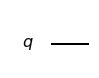

In [2]:
from qiskit import QuantumCircuit

num_qubits = 1

mycircuit = QuantumCircuit(num_qubits)
mycircuit.draw("mpl")

The above quantum circuit does not contain any gates. Therefore, if you start in any state, say $\vert0\rangle$, applying this circuit to your state doesn't change the state. 

To see this clearly, let's create the statevector $\vert0\rangle$. In `Qiskit`, you can do this using the following:

In [4]:
from qiskit.quantum_info import Statevector

sv = Statevector.from_label("0")

You can see what's contained in the object `sv`:

In [5]:
sv

Statevector([1.+0.j, 0.+0.j],
            dims=(2,))

The vector itself can be found by writing

In [6]:
sv.data

array([1.+0.j, 0.+0.j])

As you can see, the above matches what we expect. Recall that $$\vert0\rangle = \begin{bmatrix}1\\0\end{bmatrix}$$

We can now apply the quantum circuit `mycircuit` to this state by using the following:

In [7]:
new_sv = sv.evolve(mycircuit)

Once again, you can look at the new statevector by writing

In [8]:
new_sv

Statevector([1.+0.j, 0.+0.j],
            dims=(2,))

As you can see, the statevector hasn't changed. Recall the concept of state projection that you learned in Chapter 1. You can compute the projection of `new_sv` onto `sv` by writing

In [9]:
from qiskit.quantum_info import state_fidelity

state_fidelity(sv, new_sv)

1.0

As you can see, the projection of `new_sv` onto `sv` is 1, indicating that the two states are identical. You can visualize this state using the `qsphere` by writing

# QSphere

The q-sphere represents the state of a system of qubits by associating each computational basis state with a point on the surface of a sphere. A node is visible at each point. Each node’s radius is proportional to the magnitude of its basis state’s amplitude. Each node’s color indicates the phase angle of its basis state’s amplitude.

The nodes are laid out on the q-sphere so that the basis state with all zeros (e.g., $\vert000\rangle$ is at its north pole, and the basis state with all ones (e.g., $\vert111\rangle$) is at its south pole. Basis states with the same number of zeros (or ones) lie on a shared latitude of the q-sphere (e.g., $\vert001\rangle$, $\vert010\rangle$, $\vert001\rangle$ ). Beginning at the north pole of the q-sphere and progressing southward, each successive latitude has basis states with a greater number of ones.

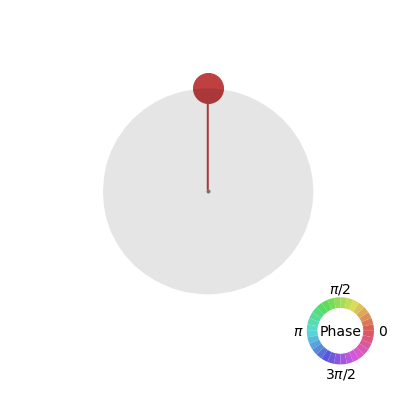

In [10]:
from qiskit.visualization import plot_state_qsphere

plot_state_qsphere(sv.data)

As expected the `sv` vector being $\vert0\rangle = \begin{bmatrix}1\\0\end{bmatrix}$ is visualized as a node of unit radius pointing North. We know that applying an $X$ gate flips the qubit from the state $\vert0\rangle$ to the state $\vert1\rangle$. To see this clearly, we will first create a single-qubit quantum circuit with the $X$ gate.

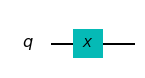

In [11]:
mycircuit = QuantumCircuit(1)
mycircuit.x(0)

mycircuit.draw("mpl")

Now, we can apply this circuit onto our state by writing

In [12]:
sv = Statevector.from_label("0")
new_sv = sv.evolve(mycircuit)
new_sv

Statevector([0.+0.j, 1.+0.j],
            dims=(2,))

As you can see, the statevector now corresponds to that of the state $\vert1\rangle$. Recall that

$$\vert1\rangle = \begin{bmatrix}0\\1\end{bmatrix}$$

Now, the projection of `new_sv` onto `sv` is 

In [13]:
state_fidelity(new_sv, sv)

0.0

This is not surprising since we know that the states $\vert0\rangle$ and $\vert1\rangle$ are orthogonal. Therefore, $\langle0\vert1\rangle = 0$. The state can be shown on the `qsphere` by writing

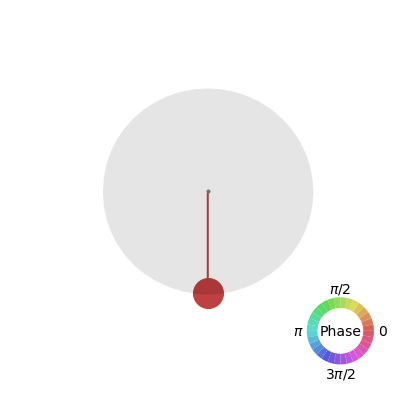

In [14]:
plot_state_qsphere(new_sv.data)

Similarly, we can create the state $$\frac{1}{\sqrt{2}}\left(\vert0\rangle + \vert1\rangle\right)$$
by applying a Hadamard gate as we learned in Chapter 1. Here is how we can create the state and visualize it in `Qiskit`:

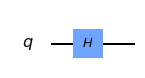

In [15]:
sv = Statevector.from_label("0")
mycircuit = QuantumCircuit(1)
mycircuit.h(0)
mycircuit.draw("mpl")

In [ ]:
new_sv = sv.evolve(mycircuit)
print(new_sv)
plot_state_qsphere(new_sv.data)

As you can see above, the state has equal components of $\vert0\rangle$ and $\vert1\rangle$. The size of the circle is proportional to the probability of measuring each basis state in the statevector. As a result, you can see that the size of the circles is half of the size of the circles in our previous visualizations.

Recall from Chapter 1 that we can also create other superpositions with different phase. Let's create $$\frac{1}{\sqrt{2}}\left(\vert0\rangle - \vert1\rangle\right)$$ which can be done by applying the Hadamard gate on the state $\vert1\rangle$.

In [ ]:
sv = Statevector.from_label("1")
mycircuit = QuantumCircuit(1)
mycircuit.h(0)
mycircuit.draw("mpl")

In [ ]:
new_sv = sv.evolve(mycircuit)
print(new_sv)

In [ ]:
plot_state_qsphere(new_sv.data)

This time, the bottom circle, corresponding to the basis state $\vert1\rangle$ has a different color corresponding to the phase of $\phi = \pi$. This is because the coefficient of $\vert1\rangle$ in the state $$\frac{1}{\sqrt{2}}\left(\vert0\rangle - \vert1\rangle\right)$$ is $-1$, which is equal to $e^{i\pi}$.

##  Assignment 0


### Part 1:
Can you create the state $$\frac{1}{\sqrt{2}}\left(\vert0\rangle + \vert1\rangle\right)$$ using a similar procedure? 

#### Write solution in the following cell

In [ ]:
"""YOUR SOLUTION CODE HERE"""

# define the input state vector(s)


# define the quantum circuit needed to create the state


# evolve the Statevector object


# print the new state vector data

### Part 2:

Can you recreate the following quantum circuit?

![qc_1](circuit.png)


**Hint**: The method to create a Z gate is exactly the same as the X gate but instead of calling the "x" method of the QuantumCircuit object we use the "z" method, e.g. `QuantumCircuit(num_qubit).z(index_of_qubit)`

In [ ]:
"""YOUR SOLUTION CODE HERE"""

# define the number of qubits

# instantiate a QuantumCircuit object with the required number of qubits

# add the gates in their corresponding places as shown in the figure

# call the draw method to plot the circuit

### Part 3:

Using $\lvert 111 \rangle$ as the three input qubits, evolve them through the circuit and plot the resultant Q sphere

In [ ]:
"""YOUR SOLUTION CODE HERE"""

# instatiate the Statevector object using the given input qubits


# evolve the Statevector object by passing on the QuantumCircuit object defined in part 2


# plot the qsphere using the data from the Statevector object